In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

diabetes_data = pd.read_csv('diabetic_data.csv')

[]

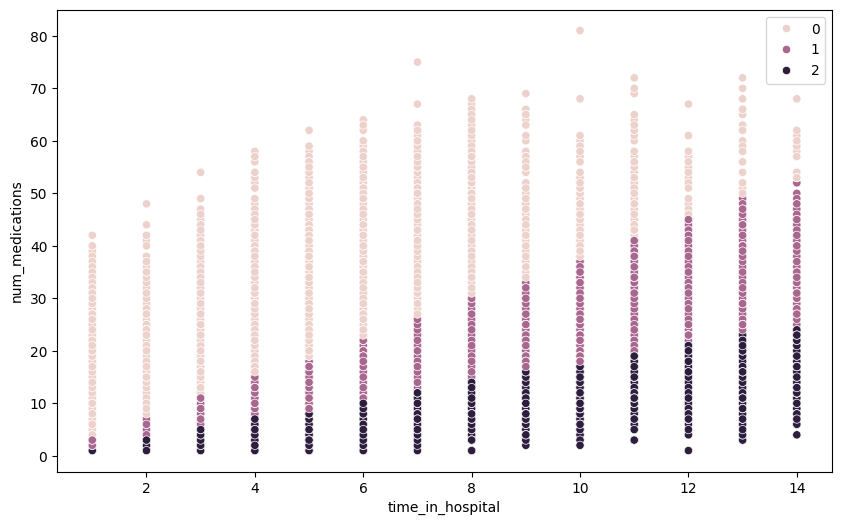

In [34]:
#1: Using one of the three datasets to demonstrate k-means clustering using the scikit learn package.

#Split the data into test (67%) and training groups (33%)
X_train, X_test, y_train, y_test = train_test_split(diabetes_data[['num_medications', 'time_in_hospital']], diabetes_data[['age']], test_size=0.33, random_state=0)

#Normalize the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

#Set the number of k-mean clusters (3), fixed random initialization of centroid, and return the best of 10 attempts
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

#Create the scatterplot using specified columns from data
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'time_in_hospital', y = 'num_medications', hue = kmeans.labels_)
plt.plot()

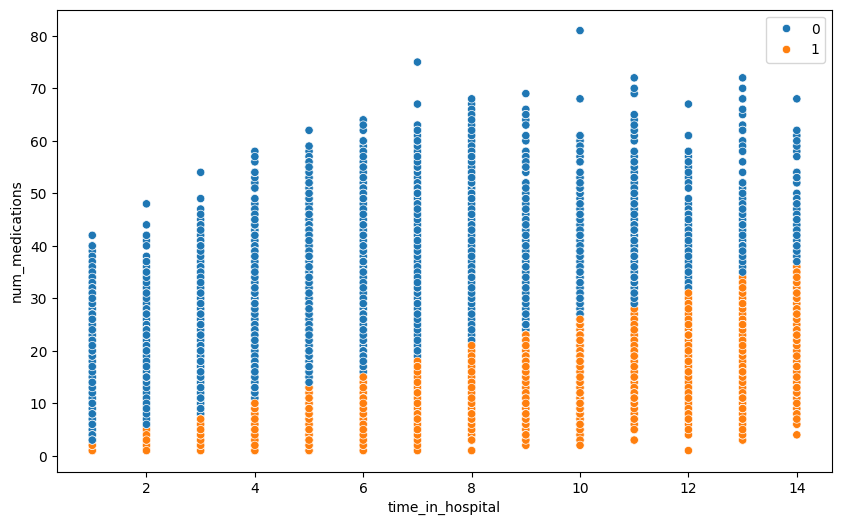

In [52]:
#2.a Calculate the sum of least square error for each different values of 'k'.

from sklearn.metrics import silhouette_score

#Create lists to store the values for fits and score within the k-cluster range
K = range(2, 8)
fits = []
score = []

#Try different values of k to find the optimal number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_train_norm)                                
    fits.append(kmeans)    #Add fit value to list                                                         
    score.append(silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')) #Add score value to list

#Plot an example using 2 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'time_in_hospital', y = 'num_medications', hue = fits[0].labels_)
plt.show()

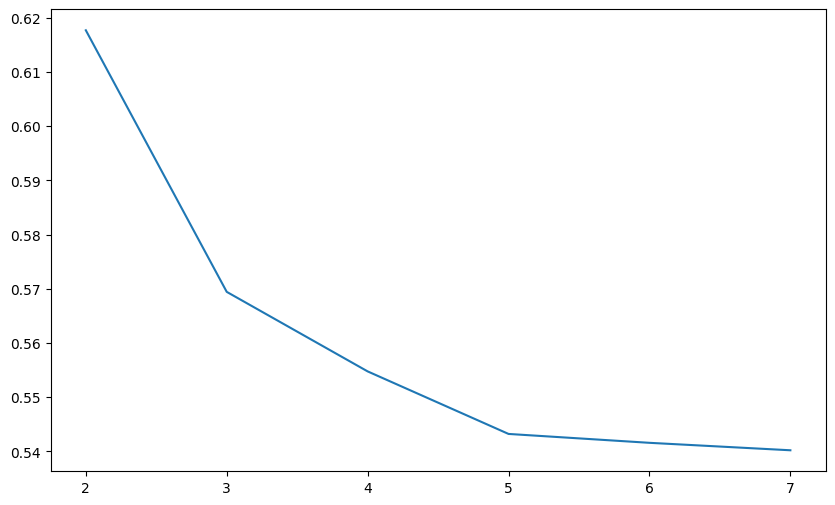

In [53]:
#2.b Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation.

#Create an elbow graph that will plot x = # of clusters vs y = score
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

#The elbow graph is going to show us the optimal number of clusters for this data. The optimal number of clusters is going to be the number of clusters
#that minimizes the difference between the data within a single cluster, while also maximizing the difference between separate clusters. This method
#will allow us to optimally group our data together. We can decide what the optimal number of clusters is on the elbow graph by looking for where the
#"elbow" is. That is where the graph curves the most to be almost horizantal. On this graph it appears that 5 clusters is most opitmal, although 3
#clusters is also pretty good.

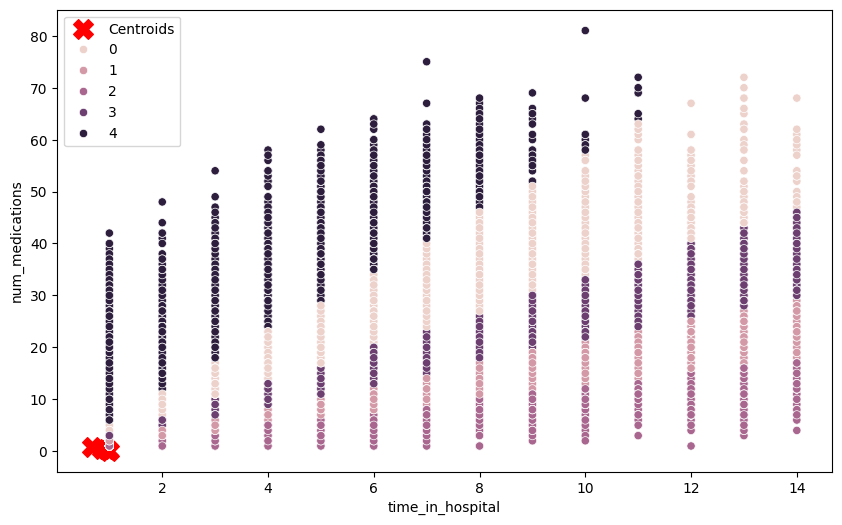

In [61]:
#3 Finally plot the optimal clusters with their centroids along with a brief explanation.

centroids = fits[3].cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
sns.scatterplot(data = X_train, x = 'time_in_hospital', y = 'num_medications', hue = fits[3].labels_)
plt.show()

#We can now visualize our data with the optimum number of clusters (5). What this graph shows, is the time_in_hospital plotted against num_medications
#where the data is grouped into 5 separate clusters based on age. The centroids should each be at the center of each cluster.